C:\Users\gaeta\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


YEAR:  2021  // start_date: 2021-01-01 00:00:00 end_date: 2022-01-01 00:00:00
        Date  Gazole    SP95     E10    SP98     E85    GPLC
0 2021-01-01  1.2754  1.3693  1.3537  1.4292  0.6517  0.8401
1 2021-01-08  1.2858  1.3899  1.3722  1.4456  0.6556  0.8359
2 2021-01-15  1.3084  1.4175  1.4011  1.4717  0.6576  0.8346
3 2021-01-22  1.3146  1.4250  1.4067  1.4786  0.6595  0.8335
4 2021-01-29  1.3135  1.4252  1.4064  1.4791  0.6605  0.8344


C:\Users\gaeta\AppData\Local\Temp\ipykernel_21656\1910245506.py:106: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_prices, x="Date", y="valeur", hue="nom", marker="o", palette=couleurs, ci=None)


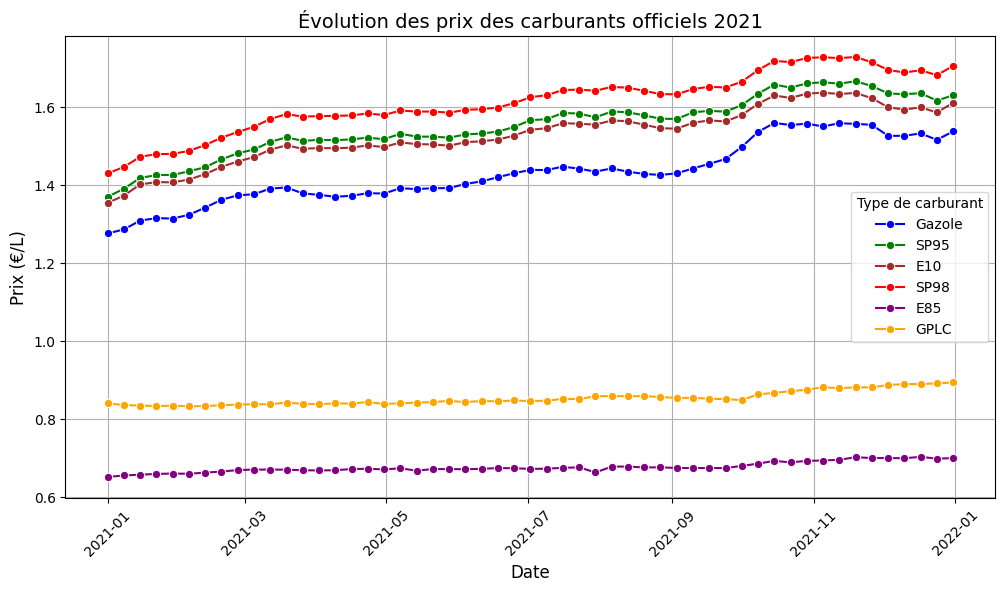

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pymongo
from datetime import datetime

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=RuntimeWarning)

# graph: https://seaborn.pydata.org/examples/errorband_lineplots.html

# Setup MongoDB connection (local)
mongo_host = "localhost"
mongo_port = 27017
mongo_user = "admin"
mongo_password = "password"
auth_db = "admin"
client_mongo = pymongo.MongoClient(
    host=mongo_host,
    port=mongo_port,
    username=mongo_user,
    password=mongo_password,
    authSource=auth_db
)
db_datalake_denorm = client_mongo.get_database("datalake")
collection_mongo = db_datalake_denorm.get_collection("official_oils_prices")

# ALL YEARS
# years = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']
#years = ['2007', '2008', '2009', '2010', '2011', '2012']
# ONE YEAR
years = ['2021']

for year in years:
    year = int(year)
    print("YEAR: ", year, " // start_date:", datetime(year, 1, 1), "end_date:", datetime(year+1, 1, 1))

    cursor = collection_mongo.find(
            {
                "Date": {"$gte": datetime(year, 1, 1), "$lt": datetime(year+1, 1, 1)}
            },
            {
                "_id": 0
            }
        )
    df_official_price = pd.DataFrame(list(cursor))

    df_official_price["Date"] = pd.to_datetime(df_official_price["Date"], format="%Y_%m_%d")
    
    df_official_price = df_official_price.rename(columns={
    'official_ttc_GAZOLE_eur_liter': 'Gazole',
    'official_ttc_SP95_eur_liter': 'SP95',
    'official_ttc_E10_eur_liter': 'E10',
    'official_ttc_SP98_eur_liter': 'SP98',
    'official_ttc_E85_eur_liter': 'E85',
    'official_ttc_GPLC_eur_liter': 'GPLC'
    })
    print(df_official_price.head(5))
    
    
#     # schéma global
#     couleurs = {
#     "E85": "purple",
#     "GPLC": "orange",
#     "Gazole": "blue",
#     "SP95": "green",
#     "E10": "yellow",
#     "SP98": "red"
#     }
#     df = df_official_price.copy()
#     plt.figure(figsize=(12,6))
#     plt.plot(df['Date'], df['E85'], label='E85', color='purple')
#     plt.plot(df['Date'], df['GPLC'], label='GPLC', color='orange')
#     plt.plot(df['Date'], df['Gazole'], label='Gazole', color='blue')
#     plt.plot(df['Date'], df['SP95'], label='SP95', color='green')
#     plt.plot(df['Date'], df['E10'], label='E10', color='brown')
#     plt.plot(df['Date'], df['SP98'], label='SP98', color='red')

#     plt.title(f"Évolution des prix des carburants {year}", fontsize=14)
#     plt.xlabel("Date", fontsize=12)
#     plt.ylabel("Prix", fontsize=12)
#     plt.xticks(rotation=45)
#     plt.legend(title="Type de carburant")
#     plt.grid(True)
#     plt.show()
    
    
    # schéma de visualisation de pattern de prix
    df_prices = df_official_price.melt(id_vars=["Date"], var_name="nom", value_name="valeur")
    df_prices['Date'] = pd.to_datetime(df_prices['Date'], errors='coerce')
    df_prices['valeur'] = pd.to_numeric(df_prices['valeur'], errors='coerce')
    df_prices = df_prices.dropna(subset=['Date', 'valeur'])

    couleurs = {
        "Gazole": "blue",
        "SP95": "green",
        "SP98": "red",
        "E10": "brown",
        "E85": "purple",
        "GPLC": "orange"
    }

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_prices, x="Date", y="valeur", hue="nom", marker="o", palette=couleurs, ci=None)
    plt.title(f"Évolution des prix des carburants officiels {year}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Prix (€/L)", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Type de carburant")
    plt.grid(True)
    plt.show()